# **House Prices - Advanced Regression Techniques**

O objetivo é prever os preços de venda e pratique engenharia de atributos, florestas aleatórias (RFs) e aumento de gradiente (gradient boosting).

## **Descrição da Competição**

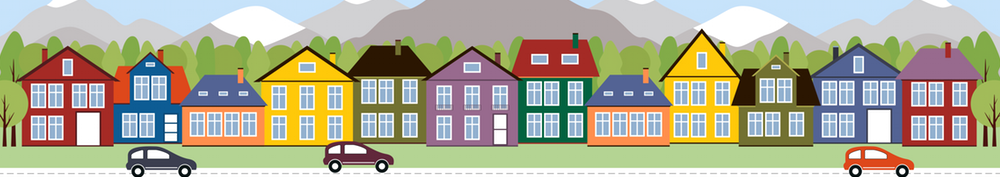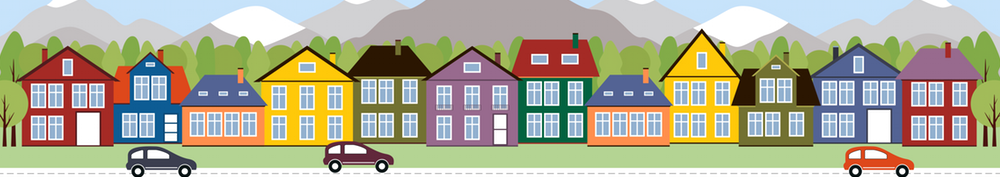

Peça a um comprador de imóveis para descrever sua casa dos sonhos, e provavelmente ele não começará pela altura do teto do porão ou pela proximidade de uma ferrovia leste-oeste. Mas o conjunto de dados desta competição prática prova que muito mais influência as negociações de preço do que o número de quartos ou uma cerca branca.

Com 79 variáveis explicativas que descrevem (quase) todos os aspectos de casas residenciais em Ames, Iowa, esta competição desafia você a prever o preço final de cada casa.

## **Habilidades práticas**

* Engenharia de recursos criativos
* Técnicas avançadas de regressão, como floresta aleatória e aumento de gradiente

## **Avaliação**

### **Objetivo**

Sua tarefa é prever o preço de venda de cada casa. Para cada Id no conjunto de teste, você deve prever o valor da variável SalePrice.

### **Métrica**

As submissões são avaliadas pelo Erro Quadrático Médio (RMSE) entre o logaritmo do valor previsto e o logaritmo do preço de venda observado. (Tomar logaritmos significa que erros na previsão de casas caras e baratas terão o mesmo impacto no resultado.)

### **Formato do Arquivo de Submissão**

O arquivo deve conter um cabeçalho e ter o seguinte formato:

```
Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221
etc.
```
